In [33]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
from dsb.training.config_training import config 
from dsb.preprocessing.step1 import *
from dsb.preprocessing.full_prep import lumTrans
from dsb.layers import nms,iou
import cv2
from suanpan import convert

## Visualization

In [34]:
# img = np.load('/work/DataBowl3/stage2/preprocess_1/d7850f462f15f4e8a21bf883450a505c_clean.npy')
# npy_dir = 'prep_result'
# patient_id = '0015ceb851d7251b8f399e39779d1e7d'
# patient_id = '0030a160d58723ff36d73f41b170ec21'
# img = np.load(os.path.join(npy_dir, f"{patient_id}_clean.npy"))
# pbb = np.load(os.path.join(npy_dir, f"{patient_id}_pbb.npy"))
img = np.load("output_2/00cba091fa4ad62cc3200a657aeb957e_clean.npy")
pbb = np.load("output_bbox/00cba091fa4ad62cc3200a657aeb957e_pbb.npy")

In [58]:
def show_nodule_with_index(img, pbb, index=0):
    # Probabilities threshold
    pbb = pbb[pbb[:,0]>-1]
    # NMS : Non-max suppression
    # Remove overlapping boxes.
    pbb = nms(pbb,0.05)
    nodule_count = pbb.shape[0]
    print('Number of nodules: ', nodule_count)
    if nodule_count <=0:
        print('no nodules')
        return
    if index > nodule_count - 1:
        index = nodule_count - 1
    for i, box in enumerate(pbb):
        box = box.astype('int')[1:]
        print(box)
        img2 = cv2.cvtColor(img[0,box[0]],cv2.COLOR_GRAY2RGB)
        plt.imshow(img2)
        cv2.rectangle(img2,(box[2]-box[3],box[1]-box[3]),(box[2]+box[3],box[1]+box[3]),(0,255,0),1)
        cv2.imwrite("tmp/test_{}.png".format(i), img2)
#     plt.imshow(img)
#     cv2.imwrite("tmp/test.png", img)

In [59]:
def show_nodule_with_index_2(img, pbb, index=0):
    # Probabilities threshold
    pbb = pbb[pbb[:,0]>-1]
    # NMS : Non-max suppression
    # Remove overlapping boxes.
    pbb = nms(pbb,0.05)
    nodule_count = pbb.shape[0]
    print('Number of nodules: ', nodule_count)
    if nodule_count <=0:
        print('no nodules')
        return
    if index > nodule_count - 1:
        index = nodule_count - 1
    print(pbb)
    box = pbb[index].astype('int')[1:]
    print(box)
    ax = plt.subplot(1,1,1)
    plt.imshow(img[0,box[0]],'gray') # slice by z axis of the box - box[0].
    plt.axis('off')
    rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
    ax.add_patch(rect)

Number of nodules:  5
[[1.0563487e+01 4.4986259e+01 1.3336830e+02 2.5381372e+01 8.8192711e+00]
 [9.0895710e+00 1.3754886e+02 5.6985783e+01 4.9807129e+01 9.4515800e+00]
 [7.8084455e+00 1.4208502e+02 2.8353851e+01 5.2785362e+01 7.7415066e+00]
 [1.6064994e+00 7.7772942e+01 1.3500286e+01 2.1332860e+02 9.1852322e+00]
 [9.1361463e-02 6.1246872e+01 2.9387468e+01 2.0962009e+02 8.8362255e+00]]
[ 44 133  25   8]


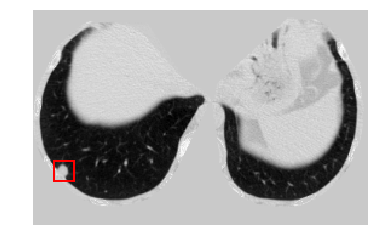

In [60]:
show_nodule_with_index_2(img, pbb, 0)

Number of nodules:  5
[ 44 133  25   8]
[137  56  49   9]
[142  28  52   7]
[ 77  13 213   9]
[ 61  29 209   8]


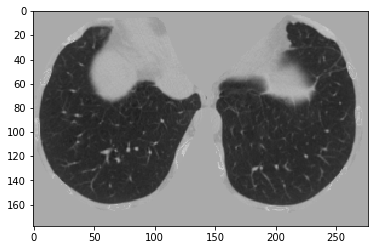

In [61]:
show_nodule_with_index(img, pbb, 0)

In [ ]:
show_nodule_with_index(img, pbb, 2)

## Break down

In [71]:
pbb.shape

(141, 5)

## Probabilities threshold

In [72]:
pbb = pbb[pbb[:,0]>-1]

In [73]:
pbb.shape

(72, 5)

## NMS : Non-max suppression
Remove overlapping boxes.

In [74]:
pbb = nms(pbb,0.05)

In [75]:
print('Number of nodules: ', pbb.shape[0])

Number of nodules:  8


In [76]:
nodule_index = 0
box = pbb[nodule_index].astype('int')[1:]

### box
```
0: z
1: y
2: x
3: r
```

In [77]:
box

array([137,  53,  56,  11])

In [78]:
img.shape

(1, 310, 216, 280)

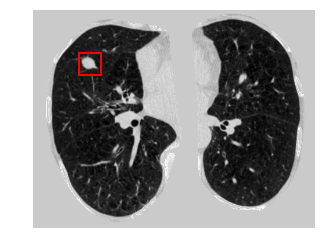

In [79]:
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray') # slice by z axis of the box - box[0].
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)
